# 온라인 쇼핑몰 매출관계 분석

- https://kosis.kr/search/search.do
- 온라인 쇼핑몰 판매매체별 / 살품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2022년 전후로 분리되어서 미리 합침)
- 행렬을 전환

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [43]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [44]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # utf-8
ori.columns = ["category","date","internet","mobile"]
ori.tail()

,category,date,internet,mobile
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.1,68403,128216
2206,기타,2024.11 p),73246,135527
2207,기타,2024.12 p),75613,144134


In [45]:
print('수정 전')
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))
print('수정 후')
print(ori['date'].tail())

수정 전
2203       2024.08
2204       2024.09
2205        2024.1
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정 후
2203    2024.08
2204    2024.09
2205     2024.1
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [46]:
ori['date'] = pd.to_datetime(ori['date'], format = '%Y.%m')
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-01-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [47]:
ex1_data = ori.copy()
#ex1_data[ex1_data['category'] == '컴퓨터 및 주변기기']
obj = ['컴퓨터 및 주변기기', '농축수산물', '의복', '신발', '가방', '음식서비스', '음·식료품', '애완용품', '여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
401,의복,2018-06-01,410733,607131
1941,음식서비스,2018-01-01,41489,460967
86,컴퓨터 및 주변기기,2024-03-01,399974,432423
606,가방,2019-07-01,54842,155097
438,의복,2021-07-01,334011,964134


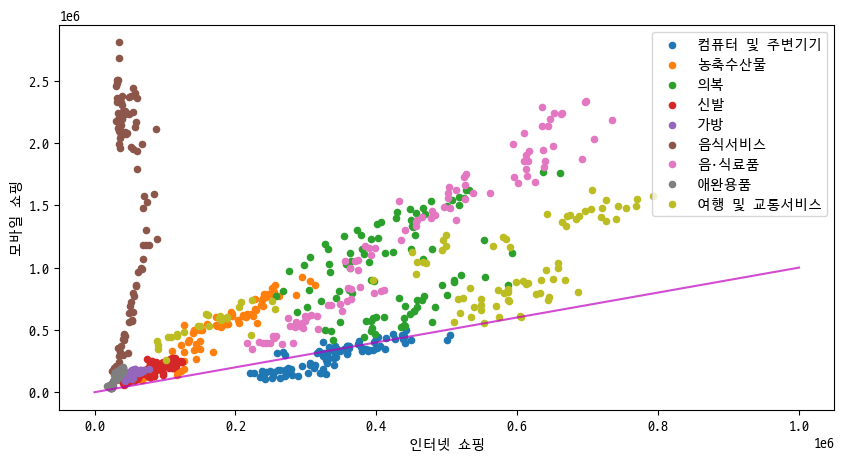

In [48]:
fig, ax = plt.subplots(figsize = (10, 5))

category = obj
for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 20, label = cate)

ax.set_xlabel('인터넷 쇼핑')
ax.set_ylabel('모바일 쇼핑')
ax.legend(loc = 'best')
ax.plot([0, 1000000], [0, 1000000], 'm-', alpha = 0.7)
plt.show()
#print(category_data, x_data, y_data)

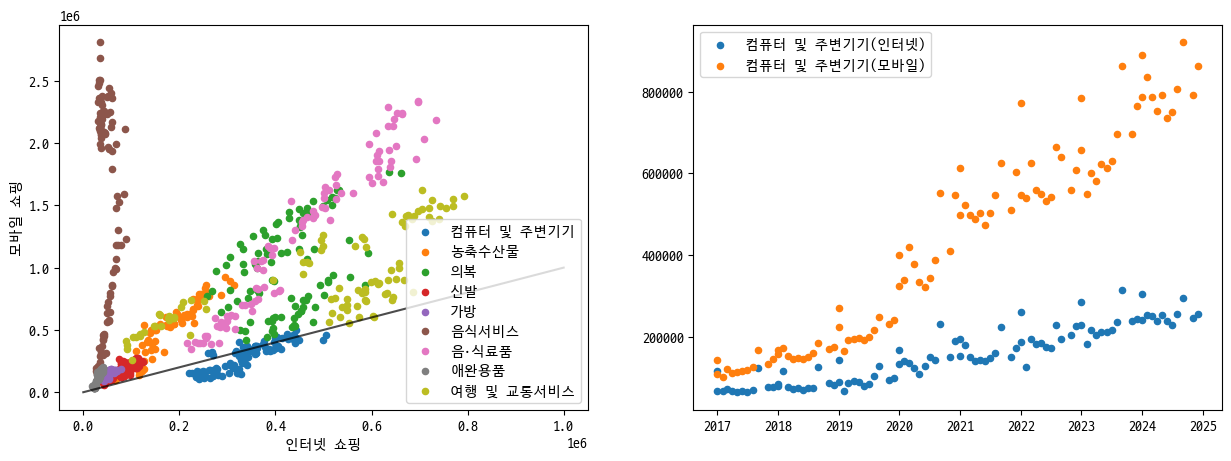

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

category = obj
for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax[0].scatter(x_data, y_data, s = 20, label = cate)

ax[0].set_xlabel('인터넷 쇼핑')
ax[0].set_ylabel('모바일 쇼핑')
ax[0].legend(loc = 'best')
ax[0].plot([0, 1000000], [0, 1000000], 'k-', alpha = 0.7)

tdata = category_data['date']
second = ex1_data[ex1_data['category'] == obj[1]]
idata = second['internet']
mdata = second['mobile']

ax[1].scatter(tdata, idata, s = 20, label = obj[0] + '(인터넷)')
ax[1].scatter(tdata, mdata, s = 20, label = obj[0] + '(모바일)')
ax[1].legend()
plt.show()
#print(category_data, x_data, y_data)